In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import gym
from matplotlib import pyplot as plt
import itertools
from agents import *
from tqdm.notebook import tqdm

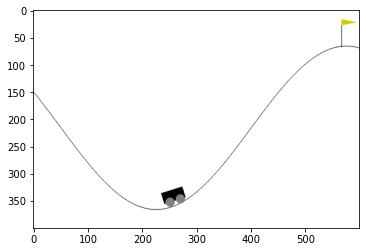

In [7]:
env = gym.make("MountainCar-v0")
state = env.reset()

frame = env.render(mode="rgb_array")
plt.imshow(frame)

[Environment page](https://gym.openai.com/envs/MountainCar-v0/)

[Environment description](https://github.com/openai/gym/wiki/MountainCar-v0)

[Environment implementation](https://github.com/openai/gym/blob/master/gym/envs/classic_control/mountain_car.py)

First number: position in the range from -1.2 to 0.6

Second number: velocity from -0.7 to 0.7

Actions:
* 0 - accelerate left
* 1 - don't accelerate
* 2 - accelerate right

In [8]:
state

array([-0.41780877,  0.        ], dtype=float32)

In [9]:
type(env)

gym.wrappers.time_limit.TimeLimit

In [15]:
def play_once(env: gym.Env, agent: BaseAgent, render: bool=False, verbose: bool=False) -> float:
    state = env.reset()
    episode_reward = 0.
    log = []
    for step in itertools.count():
        if render:
            env.render()
        prev_state = state
        action = agent.act(state)
        state, reward, is_done, _ = env.step(action)
        record = (reward, prev_state, action)
        log.append(record)
        episode_reward += reward
        if is_done:
            break
    if verbose:
        print('get {} rewards in {} steps'.format(
                episode_reward, step + 1))
    return episode_reward, log

In [16]:
agent = OrininalSmartAgent()
reward, _ = play_once(env, agent, render=True)
reward

-93.0

In [12]:
discretizer = Discretizer(20, 20)
discrete_env = DiscreteWrapper(env, discretizer)
discrete_policy = get_discrete_policy(discretizer, agent, eps=0.)

In [13]:
agent = DisceteSmartAgent(discretizer.n_states, discrete_policy)
reward, _ = play_once(discrete_env, agent, render=True)
reward

-107.0

In [14]:
agent = OffPolicyMCAgent(discretizer.n_states, discrete_policy)
test_episodes = 100
for episode in tqdm(range(10_000)):
    state = env.reset()
    log = []
    for step in itertools.count():
        prev_state = state
        action = agent.act(state)
        state, reward, is_done, _ = env.step(action)
        record = (reward, prev_state, action)
        log.append(record)
        if is_done:
            break    
    agent.update(log)
    agent.compute_policy()

    if episode % 1_000 == 0:
        rewards = 0.
        for _ in range(test_episodes):
            for step in itertools.count():
                prev_state = state
                action = agent.act(state)
                state, reward, is_done, _ = env.step(action)
                rewards += reward
                if is_done:
                    break    

            rewards += reward
        rewards /= test_episodes
        print(f"After {episode} episodes average reward = {rewards}")

    


  0%|          | 0/100 [00:00<?, ?it/s]